In [1]:
from scipy.stats import binom
from scipy.special import binom as ncr
from scipy.misc import factorial
from random import random
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
import merge_alg
sys.path.append('../common')
import common_probs
from sampler import DepthSampler
import arbitrary_probs_util as string_util
sys.path.append('../experimental')
from failure_tree import FailureTree
import markov_signature_size

In [2]:
# Test to see if merge expected value is accurate.

URNS = 5
BALLS = 3

# Compute expected value from the sum.
dist = common_probs.uniform_urn_dist(URNS, BALLS)
summed_expected = 0
for k in xrange(URNS + 1):
    summed_expected += k * dist[k]
    
# Compute expected value from the analytic expression.
analytic = URNS * (1 - (1 - 1 / URNS) ** BALLS)

print summed_expected, analytic

2.44 2.44


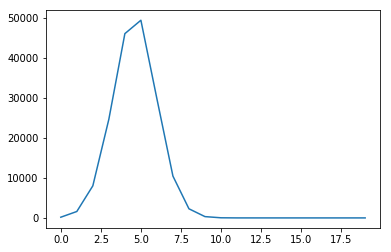

In [10]:
# Try scheme where we just plug in expected output into merging expected value.
PROBS = [0.5 for _ in range(4)]
DEPTH = 20

c_2 = common_probs.get_arbitrary_c2(PROBS)
ptm = markov_signature_size.get_ptm(c_2, DEPTH)

def step(prev):
    nxt = len(PROBS) * np.dot(prev, ptm)
    nxt = merge(nxt)
    return nxt

def merge(vec):
    vec_size = vec.shape[1]
    for ind in xrange(vec_size):
        balls = vec[0,ind]
        urns = ncr(vec_size, ind + 1)
        after_merge = urns * (1 - (1 - 1 / urns) ** balls)
#         print vec[0, ind] - after_merge # Seems merging a decent amount
        vec[0, ind] = after_merge
    return vec

total = np.zeros((1, DEPTH))
curr = np.zeros((1, DEPTH))
curr[0,0] = 1
for _ in xrange(DEPTH):
    total += curr
    curr = step(curr)
    
plt.plot(range(total.shape[1]), total[0])
plt.show()